In [1]:
# !pip install scikit-plot
# !pip install shap
# !pip install helpers
# !pip install pmdarima

import pandas as pd
import numpy as np
from numpy import sort
import seaborn as sn
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn.model_selection import cross_val_score
import shap
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

%matplotlib inline
import seaborn as sns
from scikitplot.metrics import plot_roc_curve
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 47.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [6]:
df = pd.read_excel('/content/commodity_xgboost.xlsx')

df.head()

,Dates,Avg_price_tomatoes,min_price,max_price,GLD_US_Equity,BCOM_Index,USO_US_Equity,USGG10YR_Index,CPURNSA_Index,National_Average_Gas_Price,Avg_Rain,Avg_Temp,Avg_None,Avg_D_0,Avg_D_1,Avg_D_2,Avg_D_3,Avg_D_4
0,2016-01,1.92,0.95,1.77,105.090460,75.314765,74.548000,2.072645,236.525000,2.028,0.02,-4.54,100.0,0.0,0.0,0.0,0.0,0
1,2016-02,1.92,0.69,1.25,115.049486,75.368771,69.048500,1.769695,236.897381,1.822,0.05,0.02,100.0,0.0,0.0,0.0,0.0,0
2,2016-03,1.65,0.65,1.78,118.866087,79.166439,79.610435,1.883543,237.111000,1.841,0.07,8.19,100.0,0.0,0.0,0.0,0.0,0
3,2016-04,1.71,0.49,1.49,118.719524,81.153324,82.555881,1.796205,238.132000,2.083,0.10,12.31,100.0,0.0,0.0,0.0,0.0,0
4,2016-05,1.56,0.33,0.99,120.068636,84.453250,91.810909,1.803418,239.209682,2.240,0.08,17.25,100.0,0.0,0.0,0.0,0.0,0


In [7]:
df["Dates"] = pd.to_datetime(df['Dates'])

In [8]:
df_final = df.drop(['Dates'],axis=1)
df_final

,Avg_price_tomatoes,min_price,max_price,GLD_US_Equity,BCOM_Index,USO_US_Equity,USGG10YR_Index,CPURNSA_Index,National_Average_Gas_Price,Avg_Rain,Avg_Temp,Avg_None,Avg_D_0,Avg_D_1,Avg_D_2,Avg_D_3,Avg_D_4
0,1.92,0.95,1.77,105.090460,75.314765,74.548000,2.072645,236.525000,2.028,0.02,-4.54,100.0,0.0,0.0,0.00,0.0,0
1,1.92,0.69,1.25,115.049486,75.368771,69.048500,1.769695,236.897381,1.822,0.05,0.02,100.0,0.0,0.0,0.00,0.0,0
2,1.65,0.65,1.78,118.866087,79.166439,79.610435,1.883543,237.111000,1.841,0.07,8.19,100.0,0.0,0.0,0.00,0.0,0
3,1.71,0.49,1.49,118.719524,81.153324,82.555881,1.796205,238.132000,2.083,0.10,12.31,100.0,0.0,0.0,0.00,0.0,0
4,1.56,0.33,0.99,120.068636,84.453250,91.810909,1.803418,239.209682,2.240,0.08,17.25,100.0,0.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.74,0.79,1.69,167.109545,94.540159,47.242273,1.277341,272.943591,3.159,0.10,24.66,0.0,100.0,100.0,82.61,9.9,0
68,1.82,0.69,1.39,166.268636,97.849682,50.042273,1.364627,273.567000,3.176,0.04,21.31,0.0,100.0,100.0,85.80,0.0,0
69,1.81,0.79,0.99,166.129048,103.576705,56.497619,1.577033,274.310000,3.190,0.18,13.95,0.0,100.0,100.0,100.00,0.0,0
70,1.76,0.89,0.89,169.944545,102.299636,55.098636,1.555109,276.485409,3.390,0.06,5.44,0.0,100.0,40.0,0.00,0.0,0


In [9]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(df_final.values)
final_df = pd.DataFrame(scaled_df,columns= ["Avg_price_tomatoes", "min_price", "max_price", "GLD_US_Equity", "BCOM_Index", 
            "USO_US_Equity", "USGG10YR_Index", "CPURNSA_Index", "National_Average_Gas_Price", 
            "Avg_Rain", "Avg_Temp", "Avg_None", "Avg_D_0", "Avg_D_1", "Avg_D_2", "Avg_D_3", "Avg_D_4"])

final_df.head()

,Avg_price_tomatoes,min_price,max_price,GLD_US_Equity,BCOM_Index,USO_US_Equity,USGG10YR_Index,CPURNSA_Index,National_Average_Gas_Price,Avg_Rain,Avg_Temp,Avg_None,Avg_D_0,Avg_D_1,Avg_D_2,Avg_D_3,Avg_D_4
0,0.8000,0.942857,0.830769,0.000000,0.326233,0.533379,0.573563,0.000000,0.149282,0.03125,0.133762,1.0,0.0,0.0,0.0,0.0,0.0
1,0.8000,0.571429,0.430769,0.124641,0.327521,0.476484,0.454217,0.008990,0.020612,0.12500,0.261100,1.0,0.0,0.0,0.0,0.0,0.0
2,0.4625,0.514286,0.838462,0.172408,0.418058,0.585752,0.499067,0.014147,0.032480,0.18750,0.489249,1.0,0.0,0.0,0.0,0.0,0.0
3,0.5375,0.285714,0.615385,0.170573,0.465425,0.616224,0.464661,0.038795,0.183635,0.28125,0.604300,1.0,0.0,0.0,0.0,0.0,0.0
4,0.3500,0.057143,0.230769,0.187458,0.544096,0.711971,0.467502,0.064811,0.281699,0.21875,0.742251,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_final['National_Average_Gas_Price'] = df_final['National_Average_Gas_Price'].astype(float)

df_final.dtypes

Avg_price_tomatoes            float64
min_price                     float64
max_price                     float64
GLD_US_Equity                 float64
BCOM_Index                    float64
USO_US_Equity                 float64
USGG10YR_Index                float64
CPURNSA_Index                 float64
National_Average_Gas_Price    float64
Avg_Rain                      float64
Avg_Temp                      float64
Avg_None                      float64
Avg_D_0                       float64
Avg_D_1                       float64
Avg_D_2                       float64
Avg_D_3                       float64
Avg_D_4                         int64
dtype: object

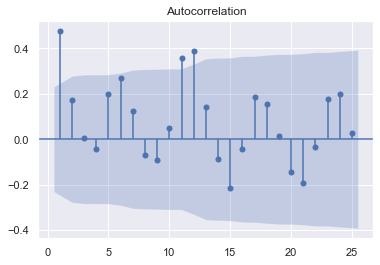

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(final_df['Avg_price_tomatoes'], lags=25, zero=False, ax=ax1);

In [33]:
#Train-test split (Original)

X = df_final.drop('Avg_price_tomatoes',axis=1)
y = df_final['Avg_price_tomatoes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [10]:
#Train-test split (Normalized)

X = final_df.drop('Avg_price_tomatoes',axis=1)
y = final_df['Avg_price_tomatoes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    x = df['Dates'],
    y = df['Avg_price_tomatoes'],
))

fig.update_layout(
    title = 'Time Series with Custom Date-Time Format',
    xaxis_tickformat = '%B (%a)<br>%Y'
)

fig.show()

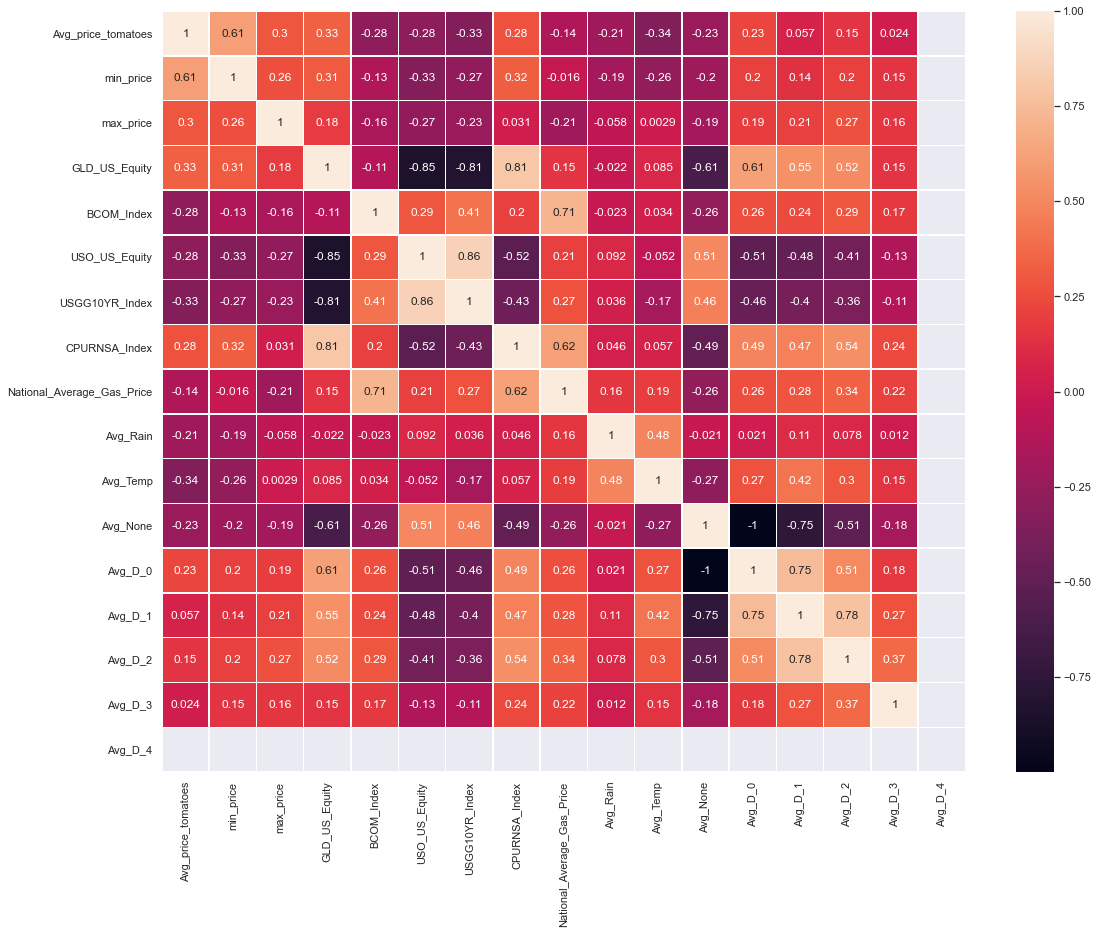

In [ ]:
sns.set(rc = {'figure.figsize':(18,14)})
corrMatrix = final_df.corr()
sns.heatmap(corrMatrix, linewidths=.5,annot=True)
#sn.heatmap(corrMatrix, linewidths=.5)
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features = ["min_price", "max_price", "GLD_US_Equity", "BCOM_Index", 
            "USO_US_Equity", "USGG10YR_Index", "CPURNSA_Index", "National_Average_Gas_Price", 
            "Avg_Rain", "Avg_Temp", "Avg_None", "Avg_D_0", "Avg_D_1", "Avg_D_2", "Avg_D_3", "Avg_D_4"]
label = "Avg_price_tomatoes"
test_df = df[df["Dates"] >= "2019-01-01"]
train_df = df[df["Dates"] < "2019-01-01"]
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]



#cat_attribs = features
#full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), 
                                    #cat_attribs)], remainder='passthrough')


#encoder = full_pipeline.fit(X_train)
#X_train = encoder.transform(X_train)
#X_test = encoder.transform(X_test)

In [34]:
#Original
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train,y_train)

#Making prediction
y_pred=model.predict(X_test)


score = model.score(X_train, y_train)  
#scores = cross_val_score(model, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )


print("Training score: ", score)
print()
print("Mean cross-validation score: %.2f" % score.mean())
print()
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print()
print('R2 score:', metrics.r2_score(y_pred_norm,y_test))

Training score:  0.9942410749287317

Mean cross-validation score: 0.99

K-fold CV average score: -0.54

Mean Absolute Error: 0.10110632451375326

Mean Squared Error: 0.0152376863814648

Root Mean Squared Error: 0.12344102389993693

Mean Absolute Percentage Error: 0.05992671311739507



In [12]:
#Normalized
model_norm = XGBRegressor(objective ='reg:squarederror')
model_norm.fit(X_train,y_train)

#Making prediction
y_pred_norm=model_norm.predict(X_test)


score = model_norm.score(X_train, y_train)  
#scores = cross_val_score(model, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model_norm, X_train, y_train, cv=kfold )


print("Training score: ", score)
print()
print("Mean cross-validation score: %.2f" % score.mean())
print()
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_norm))
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_norm))
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_norm)))
print()
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_norm))
print()
print('R2 score:', metrics.r2_score(y_pred_norm,y_test))  #R2 score shows the percentage of the model that can be explained by the coefficients

Training score:  0.9955050539486017

Mean cross-validation score: 1.00

K-fold CV average score: 0.06

Mean Absolute Error: 0.1255014181137085

Mean Squared Error: 0.02189045489269452

Root Mean Squared Error: 0.14795423242575564

Mean Absolute Percentage Error: 0.27403559857921655

R2 score: 0.38277375210683595


In [13]:
test_df = test_df.reset_index().drop("index", axis = 1)
test_df['predictions'] = pd.Series(y_pred_norm)

NameError: ignored

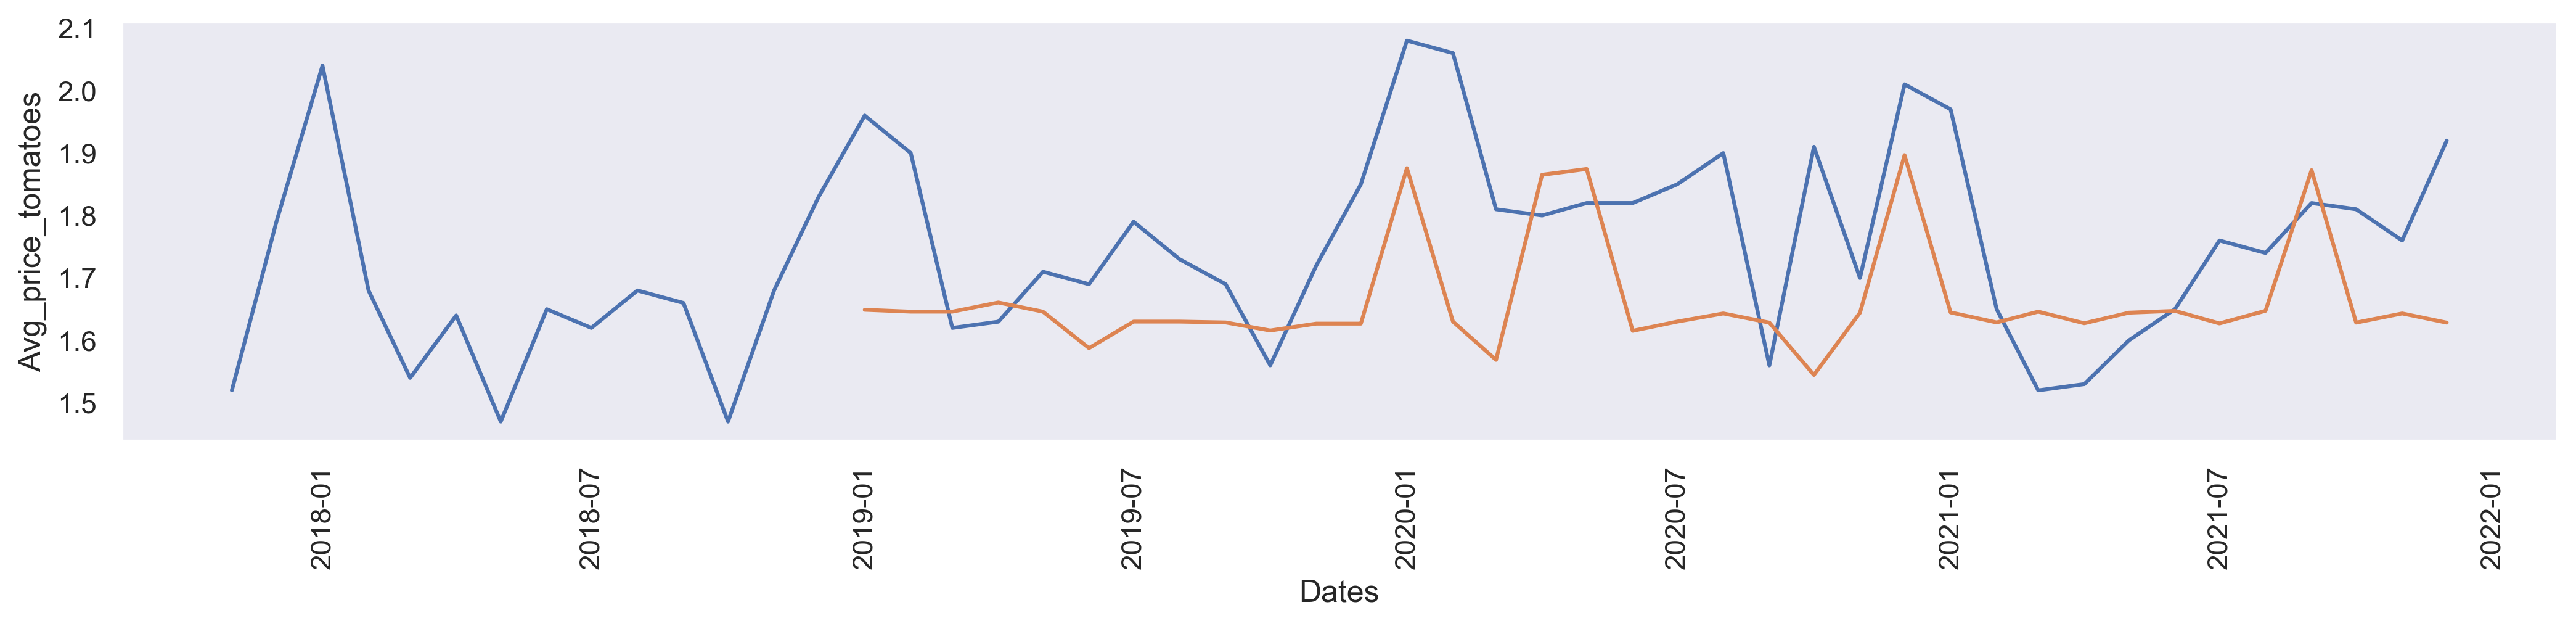

In [ ]:
plt.rcParams.update({'figure.figsize': (17,3), "figure.dpi":300})
fig, ax = plt.subplots()
sns.lineplot(data = df.tail(50), x = "Dates", y = "Avg_price_tomatoes")
sns.lineplot(data = test_df, x = "Dates", y = "predictions")
plt.grid(linestyle = '-', linewidth = 0.3)
ax.tick_params(axis = 'x', rotation = 90)

In [ ]:
#reg = XGBRegressor(n_estimators = 500, learning_rate = 0.01)
model_norm.fit(X_train,
       y_train,
       eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:1.13980	validation_1-rmse:1.27209
[1]	validation_0-rmse:1.12890	validation_1-rmse:1.26117
[2]	validation_0-rmse:1.11811	validation_1-rmse:1.25035
[3]	validation_0-rmse:1.10742	validation_1-rmse:1.23965
[4]	validation_0-rmse:1.09684	validation_1-rmse:1.22904
[5]	validation_0-rmse:1.08637	validation_1-rmse:1.21854
[6]	validation_0-rmse:1.07600	validation_1-rmse:1.20815
[7]	validation_0-rmse:1.06573	validation_1-rmse:1.19785
[8]	validation_0-rmse:1.05557	validation_1-rmse:1.18766
[9]	validation_0-rmse:1.04550	validation_1-rmse:1.17757
[10]	validation_0-rmse:1.03554	validation_1-rmse:1.16758
[11]	validation_0-rmse:1.02567	validation_1-rmse:1.15768
[12]	validation_0-rmse:1.01590	validation_1-rmse:1.14789
[13]	validation_0-rmse:1.00623	validation_1-rmse:1.13819
[14]	validation_0-rmse:0.99666	validation_1-rmse:1.12858
[15]	validation_0-rmse:0.98718	validation_1-rmse:1.11908
[16]	validation_0-rmse:0.97780	validation_1-rmse:1.10966
[17]	validation_0-rmse:0.96850	validation

[144]	validation_0-rmse:0.30770	validation_1-rmse:0.42258
[145]	validation_0-rmse:0.30517	validation_1-rmse:0.41992
[146]	validation_0-rmse:0.30267	validation_1-rmse:0.41717
[147]	validation_0-rmse:0.30020	validation_1-rmse:0.41462
[148]	validation_0-rmse:0.29775	validation_1-rmse:0.41204
[149]	validation_0-rmse:0.29532	validation_1-rmse:0.40950
[150]	validation_0-rmse:0.29293	validation_1-rmse:0.40705
[151]	validation_0-rmse:0.29055	validation_1-rmse:0.40443
[152]	validation_0-rmse:0.28820	validation_1-rmse:0.40192
[153]	validation_0-rmse:0.28586	validation_1-rmse:0.39948
[154]	validation_0-rmse:0.28356	validation_1-rmse:0.39694
[155]	validation_0-rmse:0.28127	validation_1-rmse:0.39455
[156]	validation_0-rmse:0.27901	validation_1-rmse:0.39215
[157]	validation_0-rmse:0.27677	validation_1-rmse:0.38965
[158]	validation_0-rmse:0.27456	validation_1-rmse:0.38729
[159]	validation_0-rmse:0.27237	validation_1-rmse:0.38485
[160]	validation_0-rmse:0.27019	validation_1-rmse:0.38254
[161]	validati

[286]	validation_0-rmse:0.11408	validation_1-rmse:0.22168
[287]	validation_0-rmse:0.11341	validation_1-rmse:0.22113
[288]	validation_0-rmse:0.11275	validation_1-rmse:0.22058
[289]	validation_0-rmse:0.11209	validation_1-rmse:0.22004
[290]	validation_0-rmse:0.11144	validation_1-rmse:0.21951
[291]	validation_0-rmse:0.11079	validation_1-rmse:0.21899
[292]	validation_0-rmse:0.11015	validation_1-rmse:0.21853
[293]	validation_0-rmse:0.10951	validation_1-rmse:0.21801
[294]	validation_0-rmse:0.10888	validation_1-rmse:0.21751
[295]	validation_0-rmse:0.10825	validation_1-rmse:0.21703
[296]	validation_0-rmse:0.10763	validation_1-rmse:0.21653
[297]	validation_0-rmse:0.10701	validation_1-rmse:0.21604
[298]	validation_0-rmse:0.10640	validation_1-rmse:0.21560
[299]	validation_0-rmse:0.10579	validation_1-rmse:0.21512
[300]	validation_0-rmse:0.10519	validation_1-rmse:0.21468
[301]	validation_0-rmse:0.10460	validation_1-rmse:0.21422
[302]	validation_0-rmse:0.10400	validation_1-rmse:0.21375
[303]	validati

[428]	validation_0-rmse:0.05637	validation_1-rmse:0.18585
[429]	validation_0-rmse:0.05614	validation_1-rmse:0.18574
[430]	validation_0-rmse:0.05591	validation_1-rmse:0.18565
[431]	validation_0-rmse:0.05568	validation_1-rmse:0.18554
[432]	validation_0-rmse:0.05545	validation_1-rmse:0.18544
[433]	validation_0-rmse:0.05523	validation_1-rmse:0.18534
[434]	validation_0-rmse:0.05500	validation_1-rmse:0.18524
[435]	validation_0-rmse:0.05479	validation_1-rmse:0.18514
[436]	validation_0-rmse:0.05457	validation_1-rmse:0.18504
[437]	validation_0-rmse:0.05435	validation_1-rmse:0.18495
[438]	validation_0-rmse:0.05413	validation_1-rmse:0.18485
[439]	validation_0-rmse:0.05392	validation_1-rmse:0.18476
[440]	validation_0-rmse:0.05371	validation_1-rmse:0.18466
[441]	validation_0-rmse:0.05347	validation_1-rmse:0.18460
[442]	validation_0-rmse:0.05326	validation_1-rmse:0.18449
[443]	validation_0-rmse:0.05306	validation_1-rmse:0.18439
[444]	validation_0-rmse:0.05285	validation_1-rmse:0.18430
[445]	validati

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

[Text(0.5, 1.0, 'Correlation matrix of Commodity Price Data vs. Ag Commod Futures')]

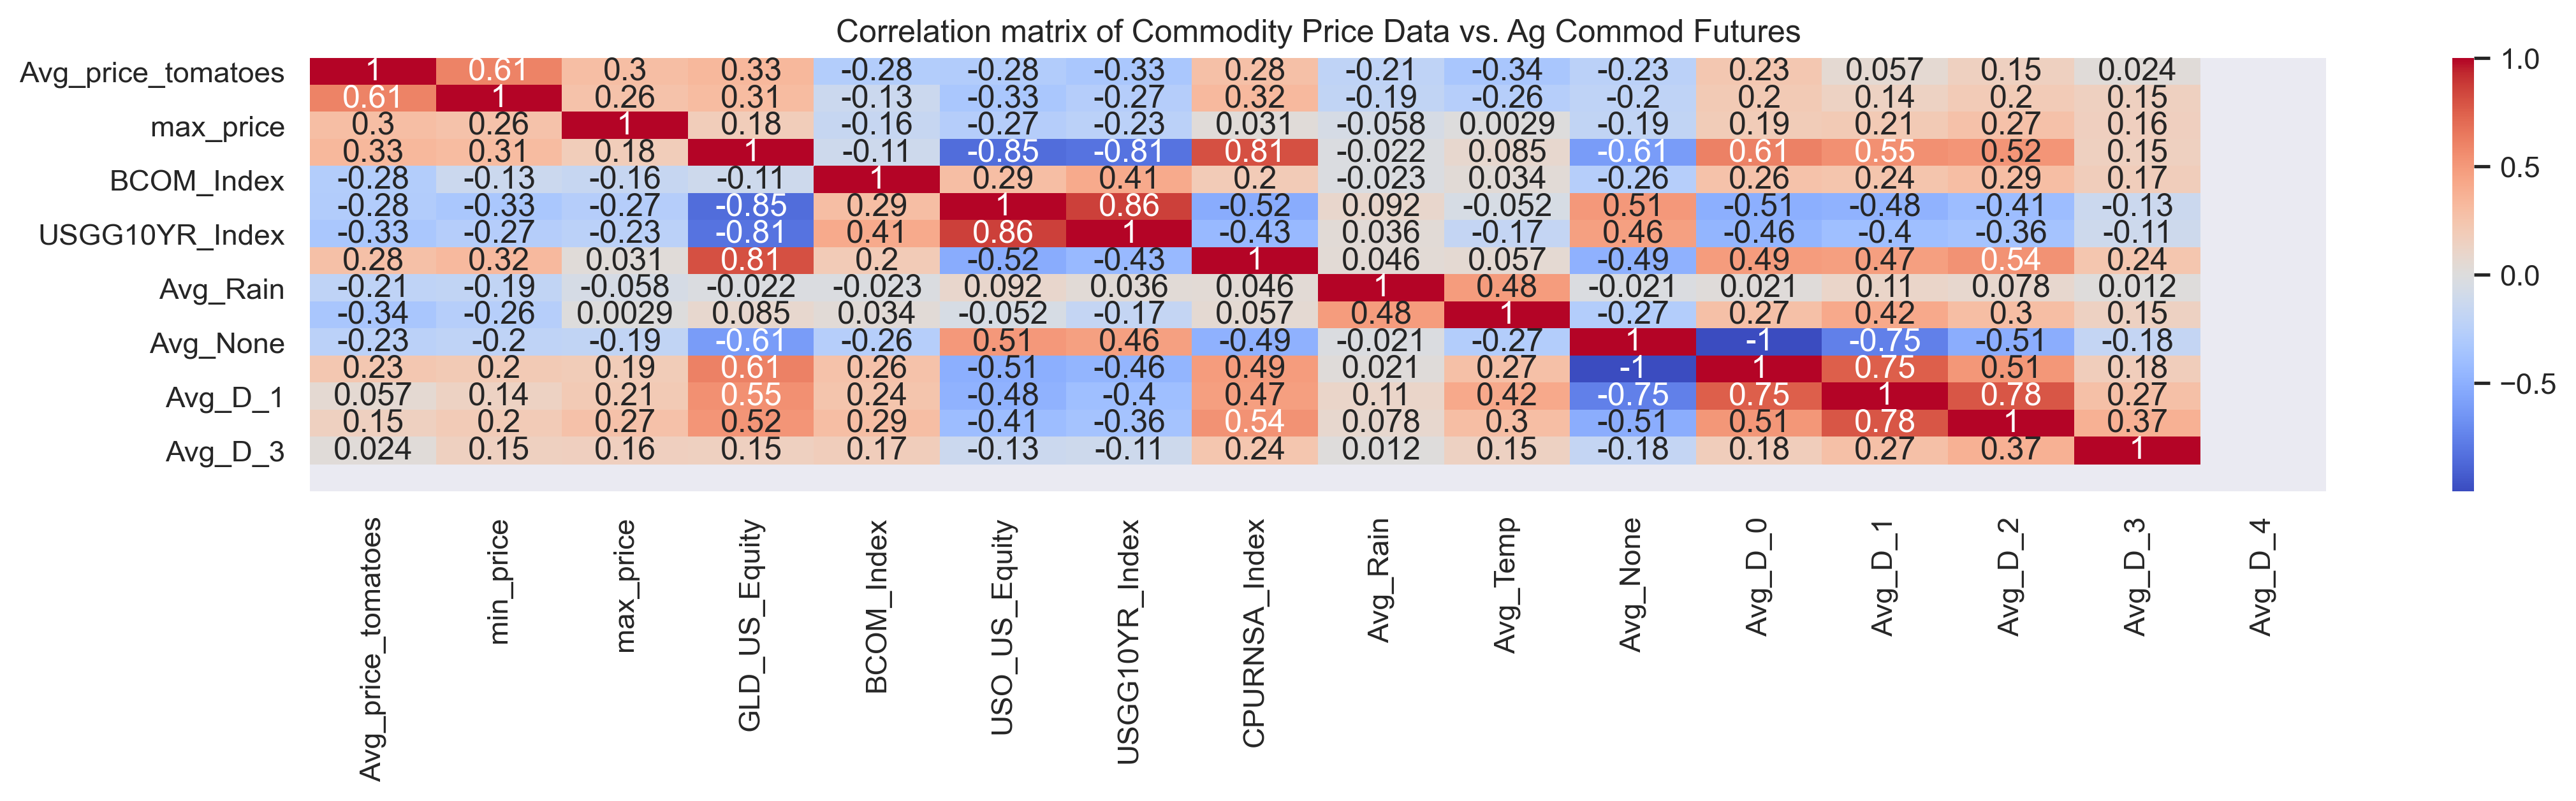

In [ ]:
import seaborn as sns
corr_heat_map = sns.heatmap(df.corr(), annot = True, fmt = '.2g', cmap = "coolwarm")
corr_heat_map.set(title = "Correlation matrix of Commodity Price Data vs. Ag Commod Futures")

In [15]:
#model.fit(X_test, y_test)
model_norm.feature_importances_

model_norm.get_booster().get_score(importance_type="gain")

{'Avg_D_1': 0.007970113763434783,
 'Avg_D_2': 0.011496995903333335,
 'Avg_None': 0.002549971250666667,
 'Avg_Rain': 0.014476265673222223,
 'Avg_Temp': 0.03328176384159375,
 'BCOM_Index': 0.032997673643440674,
 'CPURNSA_Index': 0.014383693582454544,
 'GLD_US_Equity': 0.016718177407216137,
 'National_Average_Gas_Price': 0.007208644435933333,
 'USGG10YR_Index': 0.01590630958105263,
 'USO_US_Equity': 0.002213576488320909,
 'max_price': 0.006526756043821921,
 'min_price': 0.04485186186854854}

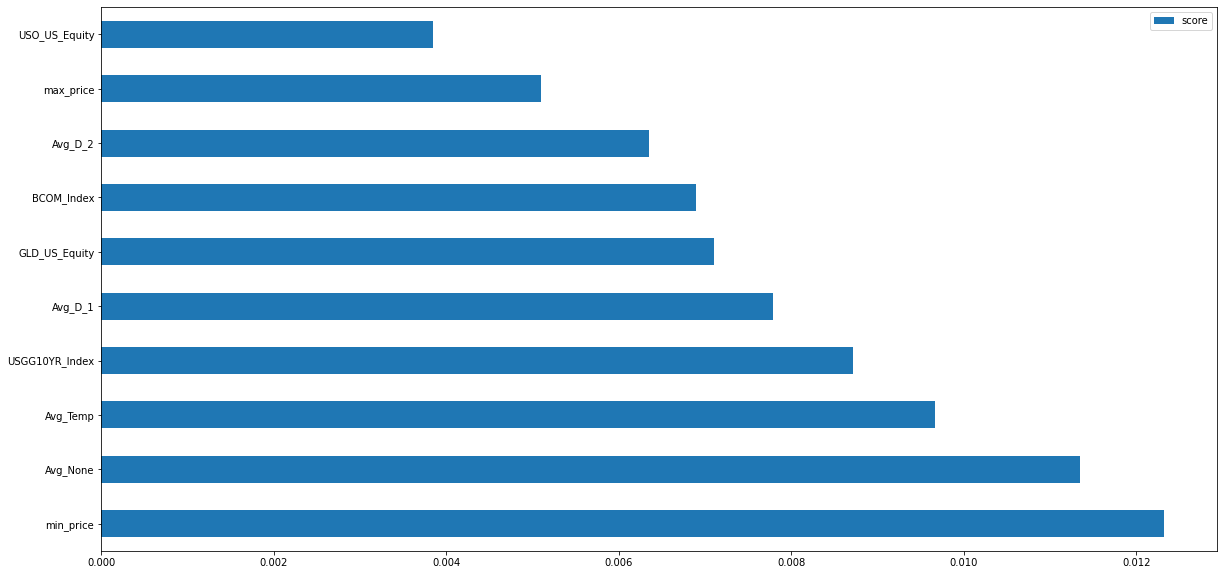

In [35]:
#Original
#The gain type shows the average gain across all splits where feature was used.
#A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 20 features

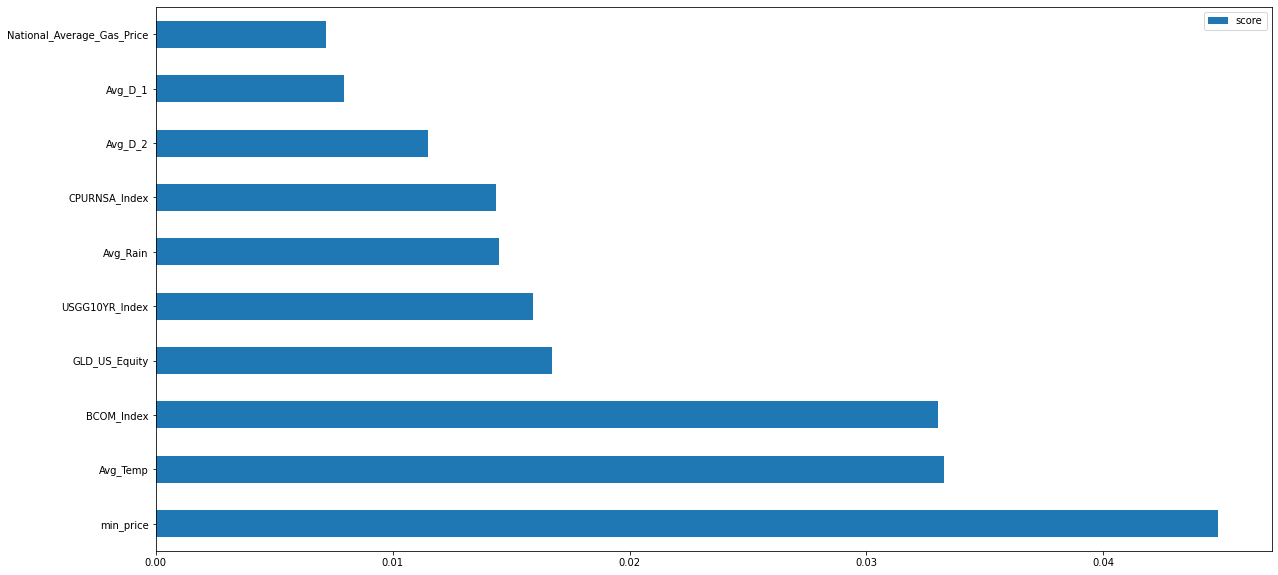

In [25]:
#Normalized

#The gain type shows the average gain across all splits where feature was used.
#A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

feature_important = model_norm.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 20 features

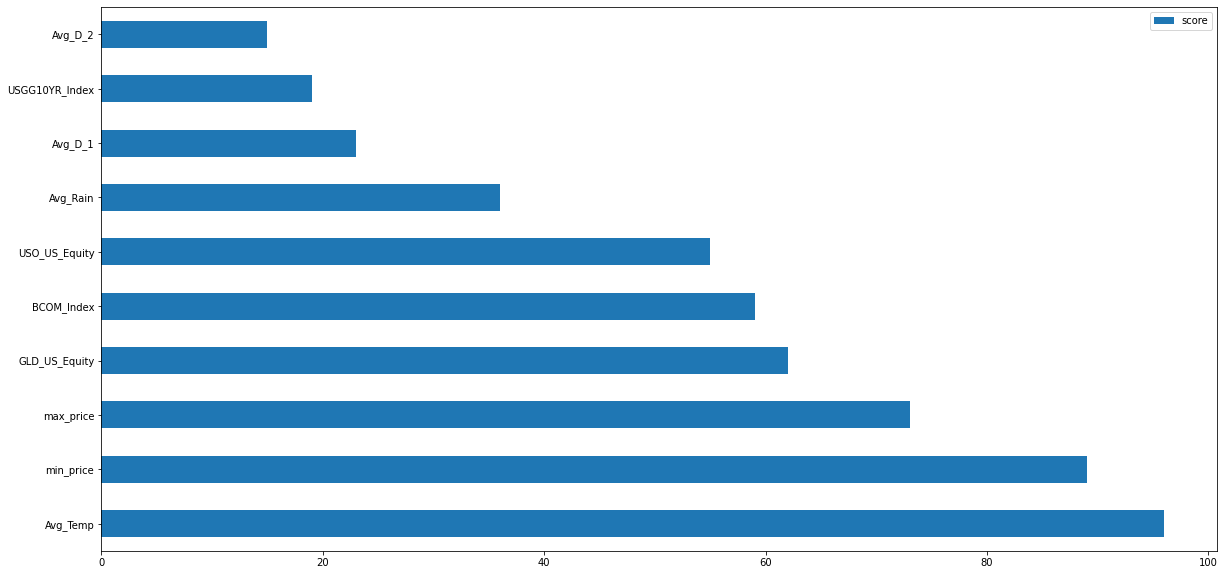

In [23]:
#The weight shows the number of times the feature is used to split data. This type of feature importance can favourize numerical and high cardinality features. 

feature_important = model_norm.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features

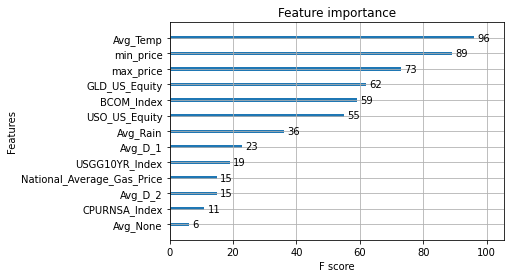

In [24]:
xgb.plot_importance(model_norm.get_booster())

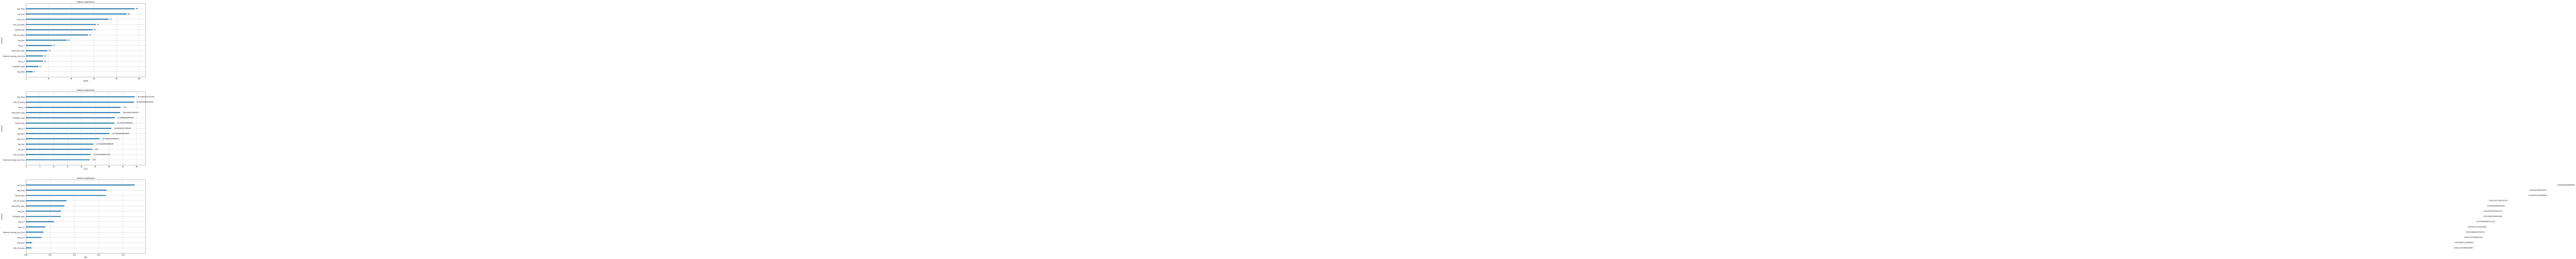

In [27]:
from xgboost import plot_importance

fig, ax = plt.subplots(3,1,figsize=(14,30))

nfeats = 15
importance_types = ['weight', 'cover', 'gain']

for i, imp_i in enumerate(importance_types):
    plot_importance(model_norm, ax=ax[i], max_num_features=nfeats
                    , importance_type=imp_i
                    , xlabel=imp_i)

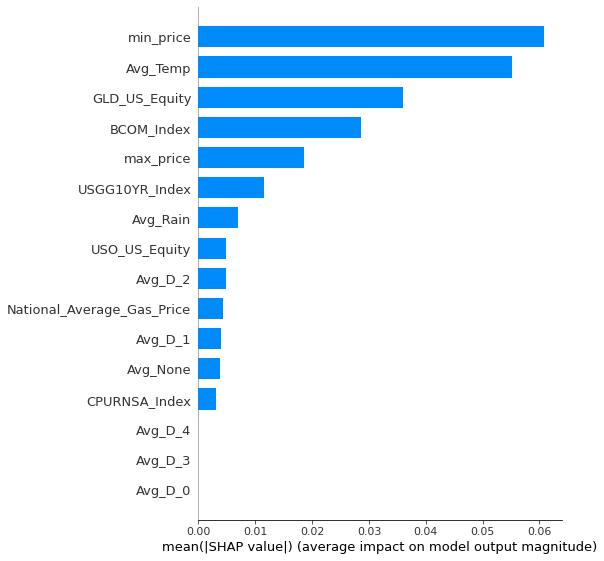

In [36]:
#Original
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

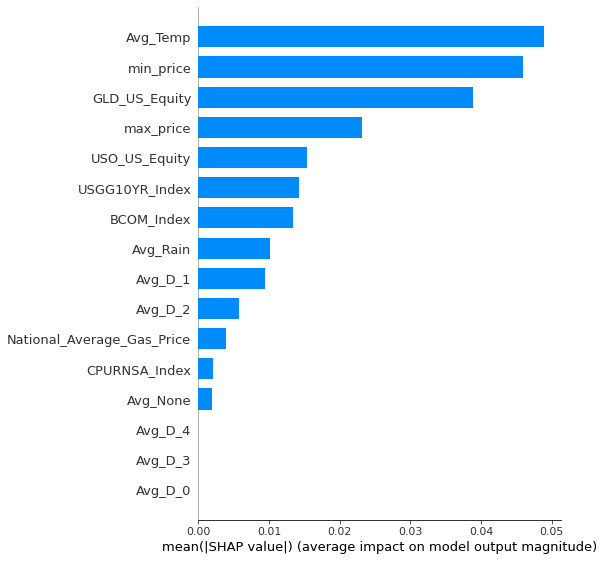

In [37]:
#Normalized
explainer = shap.TreeExplainer(model_norm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

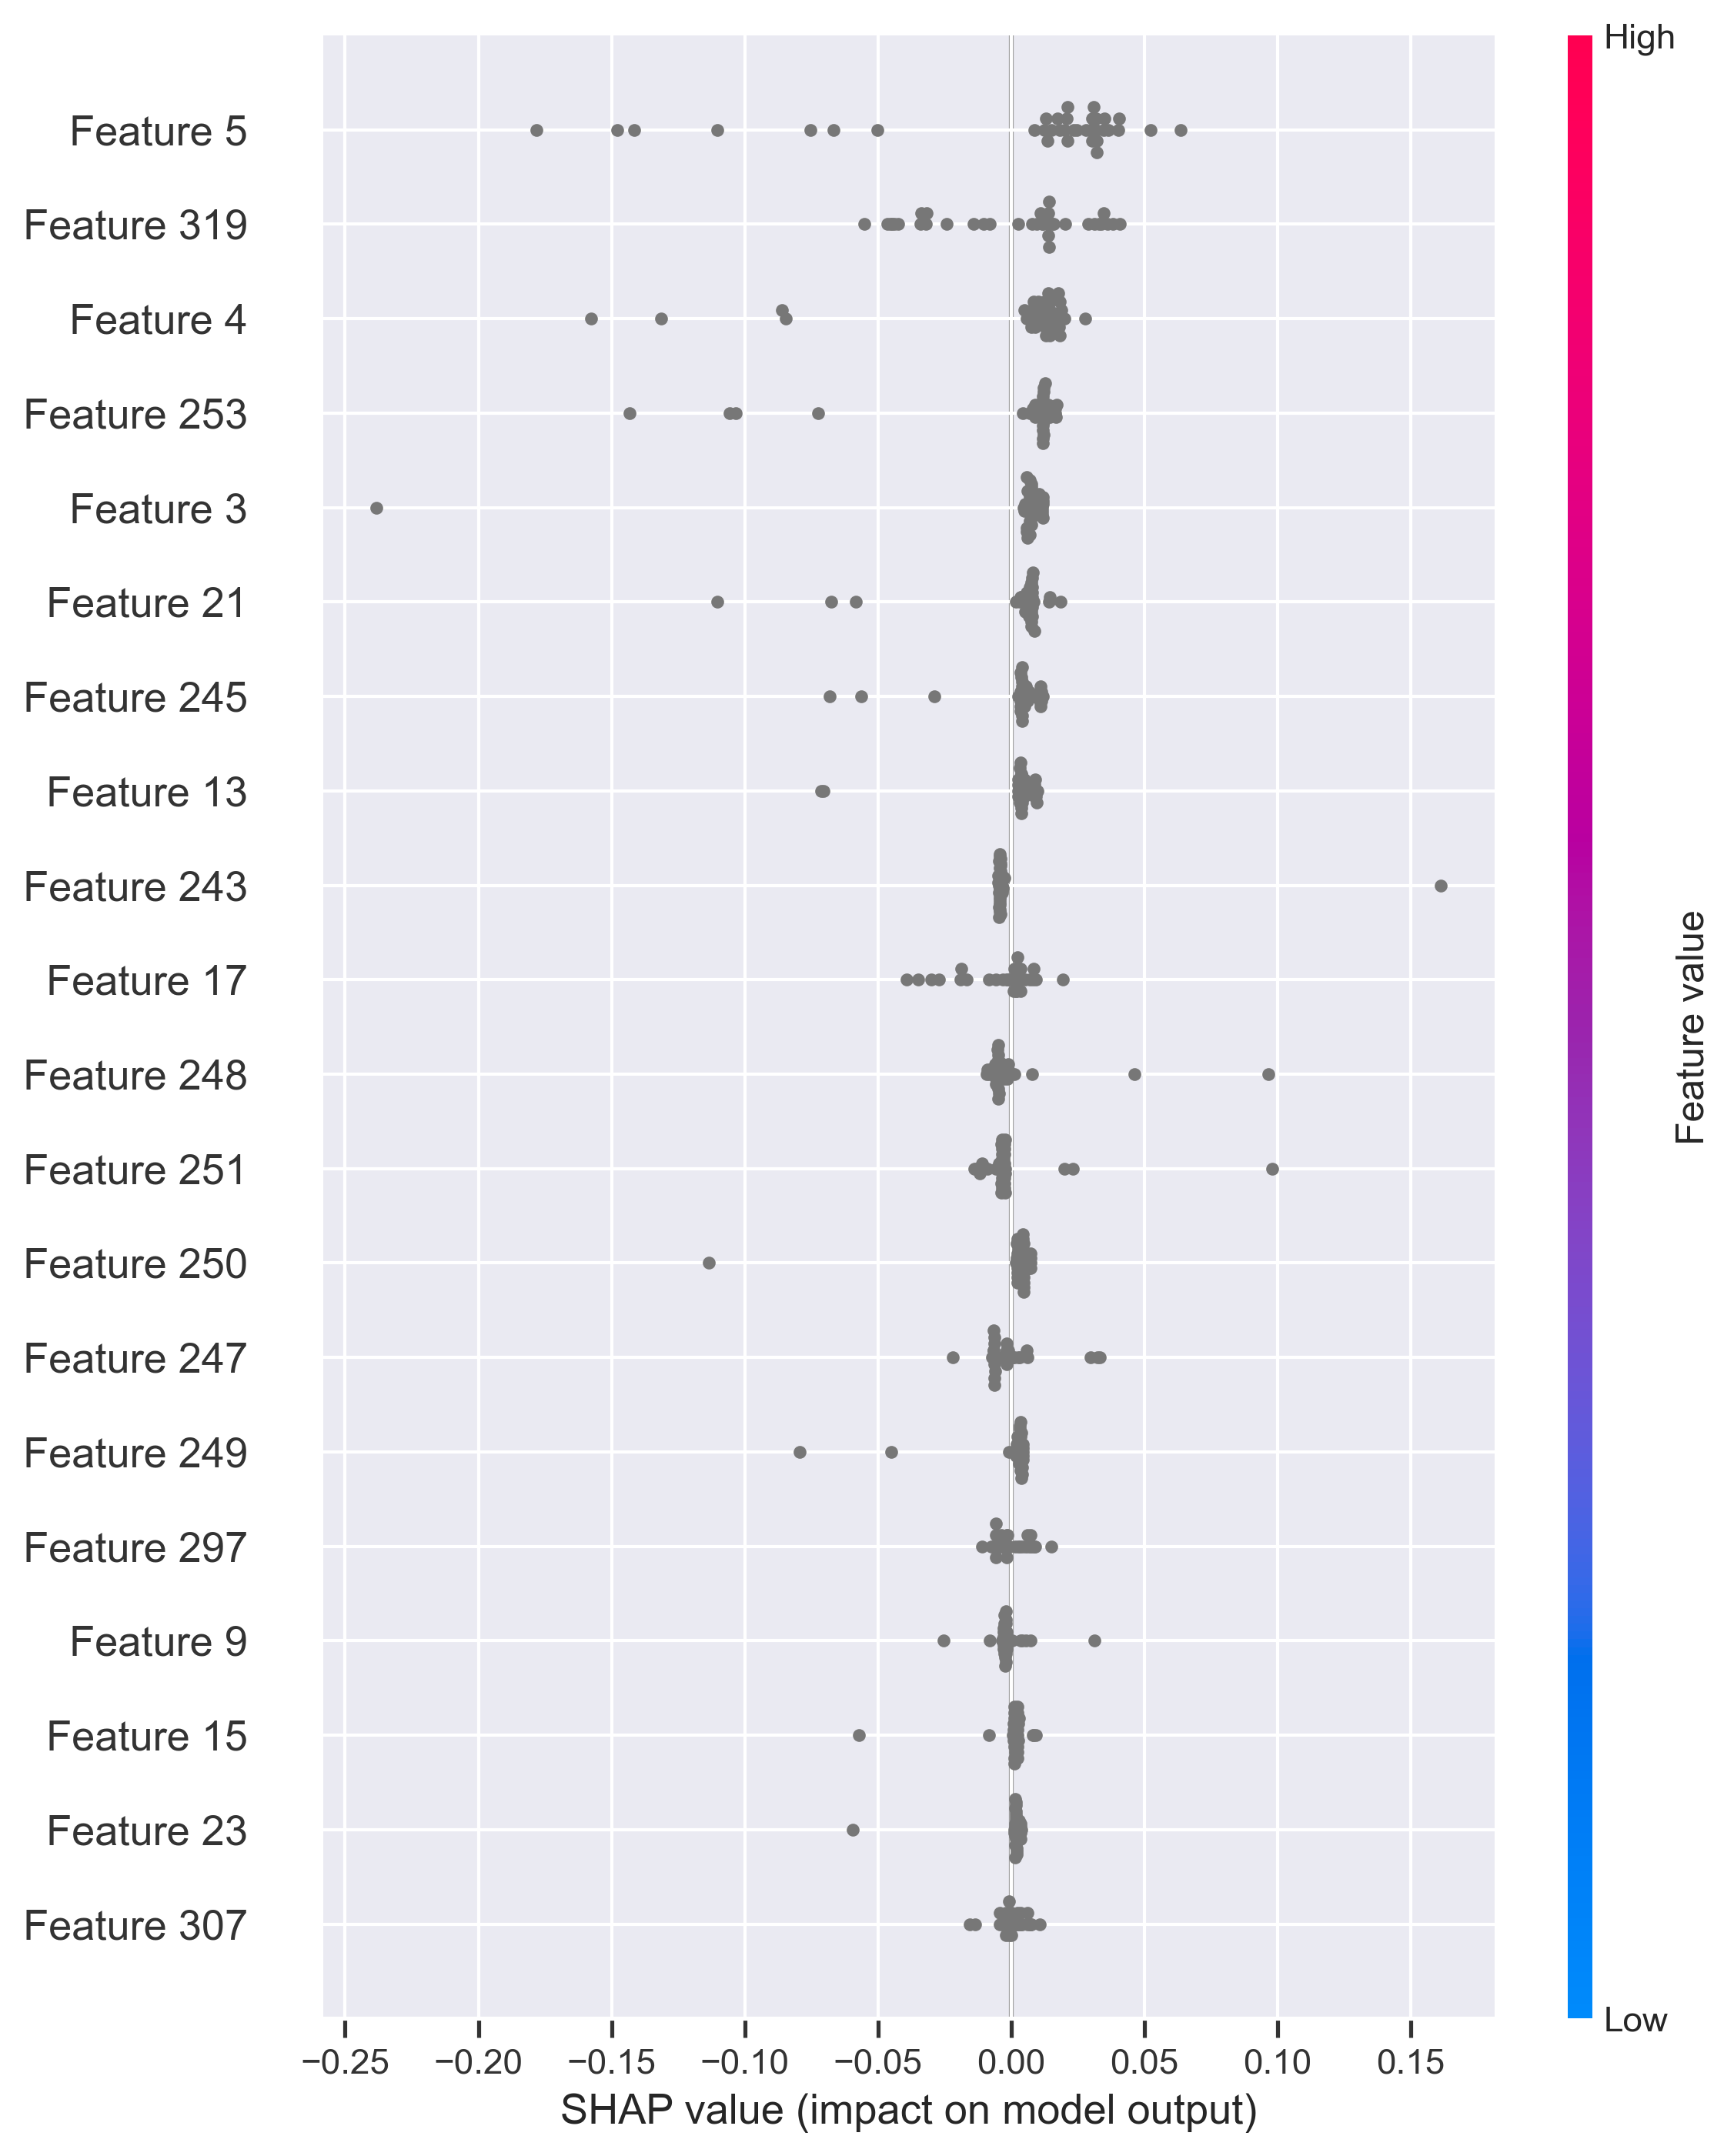

In [ ]:
shap.summary_plot(shap_values, X_test)

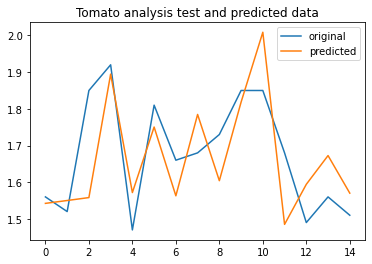

In [39]:
#Original
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Tomato analysis test and predicted data")
plt.legend()
plt.show()

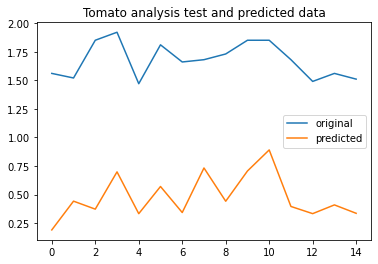

In [40]:
#Original
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_norm, label="predicted")
plt.title("Tomato analysis test and predicted data")
plt.legend()
plt.show()

In [41]:
#Linear model

from sklearn import linear_model

reg = linear_model.LinearRegression()

result = reg.fit(X_train,y_train)

In [43]:
pred_y=result.predict(X_test)

In [44]:
#Original
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, pred_y))
print('R2 score:', metrics.r2_score(pred_y,y_test))

Mean Absolute Error: 0.10567124679538482
Mean Squared Error: 0.021064286158792304
Root Mean Squared Error: 0.14513540628941066
Mean Absolute Percentage Error: 0.0626795012529904
R2 score: 0.29418956314954736


In [ ]:
#Normalized
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_norm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_pred,y_test))

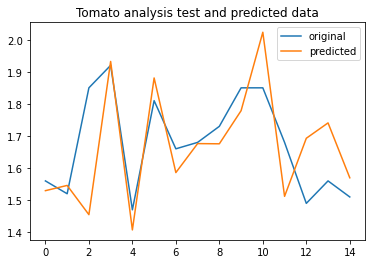

In [45]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred_y, label="predicted")
plt.title("Tomato analysis test and predicted data")
plt.legend()
plt.show()

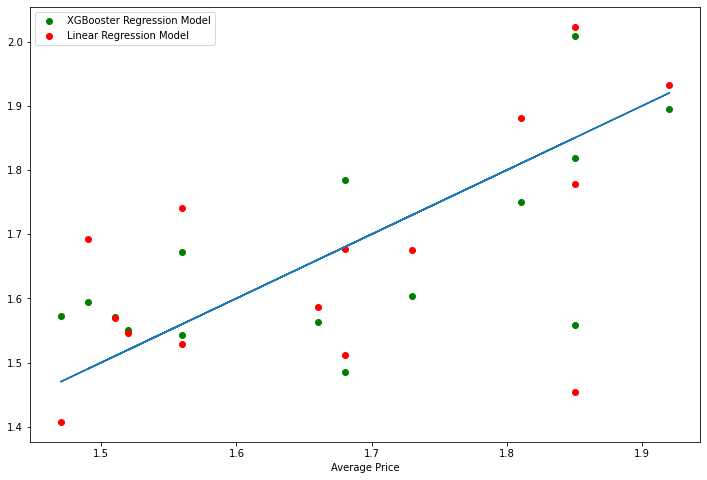

In [46]:
plt.figure(figsize=(12,8))
plt.plot(y_test,y_test)
plt.scatter(y_test,y_pred, color = 'g', label = 'XGBooster Regression Model')
plt.scatter(y_test,pred_y, color = 'r', label = 'Linear Regression Model')
plt.xlabel('Average Price')
plt.legend()



*   The Mean absolute error (**MAE**) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset. ( basically is the absolute difference between the actual or true values and the values that are predicted.)
*   Mean Squared Error (**MSE**) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
* Root Mean Squared Error (**RMSE**) is the square root of Mean Squared error. It measures the standard deviation of residuals.

Differences among these evaluation metrics
Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).
MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.
The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.
R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R-squared solves this problem.
Adjusted R squared takes into account the number of predictor variables, and it is used to determine the number of independent variables in our model. The value of Adjusted R squared decreases if the increase in the R square by the additional variable isn’t significant enough.
For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.

Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R- Squared tells how well the predictor variables can explain the variation in the response variable.

In [47]:
# Function to get all metrics into a list

def get_metrics(a,b):        
    MAE = metrics.mean_absolute_error(a,b)
    MSE = metrics.mean_squared_error(a,b)
    RMSE= np.sqrt(metrics.mean_squared_error(a,b))
    r2 = metrics.r2_score(a,b) 
    return [MAE,MSE,RMSE,r2] 
get_metrics(pred_y,y_test)

# Mertics dictionary

metrics = {'XGBoost' : get_metrics(y_test,y_pred),      
        'Linear Regression' : get_metrics(y_test, pred_y)}

comparison = pd.DataFrame(metrics,index=['MAE','MSE','RMSE','R2']) 
comparison =comparison.transpose()
comparison

,MAE,MSE,RMSE,R2
XGBoost,0.101106,0.015238,0.123441,0.301792
Linear Regression,0.105671,0.021064,0.145135,0.034811
